In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import graphviz
from sklearn import tree
from google.colab import files
from joblib import dump
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_curve, roc_auc_score, plot_roc_curve

In [ ]:
train = pd.read_csv('train2.csv')
train1 = pd.read_csv('train2Ones.csv')
train2 = pd.read_csv('train2Twos.csv')
train3 = pd.read_csv('train2Threes.csv')
test = pd.read_csv('test2.csv')
test1 = pd.read_csv('test2Ones.csv')
test2 = pd.read_csv('test2Twos.csv')
test3 = pd.read_csv('test2Threes.csv')

In [ ]:
train1x,train1y=train1.drop(['Unnamed: 0','Unnamed: 0.1','fetal_health'], axis=1),train1['fetal_health']
test1x,test1y=test1.drop(['Unnamed: 0','Unnamed: 0.1','fetal_health'], axis=1),test1['fetal_health']
train2x,train2y=train2.drop(['Unnamed: 0','Unnamed: 0.1','fetal_health'], axis=1),train2['fetal_health']
test2x,test2y=test2.drop(['Unnamed: 0','Unnamed: 0.1','fetal_health'], axis=1),test2['fetal_health']
train3x,train3y=train3.drop(['Unnamed: 0','Unnamed: 0.1','fetal_health'], axis=1),train3['fetal_health']
test3x,test3y=test3.drop(['Unnamed: 0','Unnamed: 0.1','fetal_health'], axis=1),test3['fetal_health']

In [ ]:
model1 = DecisionTreeClassifier()
model2 = DecisionTreeClassifier()
model3 = DecisionTreeClassifier()

In [ ]:
model1.fit(train1x,train1y)
model2.fit(train2x,train2y)
model3.fit(train3x,train3y)

DecisionTreeClassifier()

In [ ]:
pred1=model1.predict_proba(test1x)[:, 1]
pred2=model2.predict_proba(test2x)[:, 1]
pred3=model3.predict_proba(test3x)[:, 1]

In [ ]:
probabs = np.hstack((pred1.reshape(-1,1), pred2.reshape(-1,1), pred3.reshape(-1,1)))

In [ ]:
vals = np.argmax(probabs, axis=1) + 1

In [ ]:
def runMetrics(trueVal,preds):
  if len(set(trueVal))<=2:
    print('Accuracy = ', accuracy_score(trueVal,preds))
    print('Macro Precision = ', precision_score(trueVal,preds,average='macro'))
    print('Micro Precision = ', precision_score(trueVal,preds,average='micro'))
    print('Weighted Precision = ', precision_score(trueVal,preds,average='weighted'))
    print('Macro Recall = ', recall_score(trueVal,preds,average='macro'))
    print('Micro Recall = ', recall_score(trueVal,preds,average='micro'))
    print('Weighted Recall = ', recall_score(trueVal,preds,average='weighted'))
    print('Macro F1 = ', f1_score(trueVal,preds,average='macro'))
    print('Micro F1 = ', f1_score(trueVal,preds,average='micro'))
    print('Weighted F1 = ', f1_score(trueVal,preds,average='weighted'))
    print('\nClassification Report\n', classification_report(trueVal,preds))
  else:
    print('Accuracy = ', accuracy_score(trueVal,preds))
    print('Macro Precision = ', precision_score(trueVal,preds,average='macro'))
    print('Micro Precision = ', precision_score(trueVal,preds,average='micro'))
    print('Weighted Precision = ', precision_score(trueVal,preds,average='weighted'))
    print('Macro Recall = ', recall_score(trueVal,preds,average='macro'))
    print('Micro Recall = ', recall_score(trueVal,preds,average='micro'))
    print('Weighted Recall = ', recall_score(trueVal,preds,average='weighted'))
    print('Macro F1 = ', f1_score(trueVal,preds,average='macro'))
    print('Micro F1 = ', f1_score(trueVal,preds,average='micro'))
    print('Weighted F1 = ', f1_score(trueVal,preds,average='weighted'))
    print('\nClassification Report\n', classification_report(trueVal,preds))

In [ ]:
runMetrics(test['fetal_health'].tolist(), vals)

Accuracy =  0.9302884615384616
Macro Precision =  0.8987363800014331
Micro Precision =  0.9302884615384616
Weighted Precision =  0.9283595991777973
Macro Recall =  0.8269737354843737
Micro Recall =  0.9302884615384616
Weighted Recall =  0.9302884615384616
Macro F1 =  0.8593144560357676
Micro F1 =  0.9302884615384615
Weighted F1 =  0.9278795999082884

Classification Report
               precision    recall  f1-score   support

         1.0       0.94      0.98      0.96       329
         2.0       0.88      0.73      0.80        52
         3.0       0.87      0.77      0.82        35

    accuracy                           0.93       416
   macro avg       0.90      0.83      0.86       416
weighted avg       0.93      0.93      0.93       416



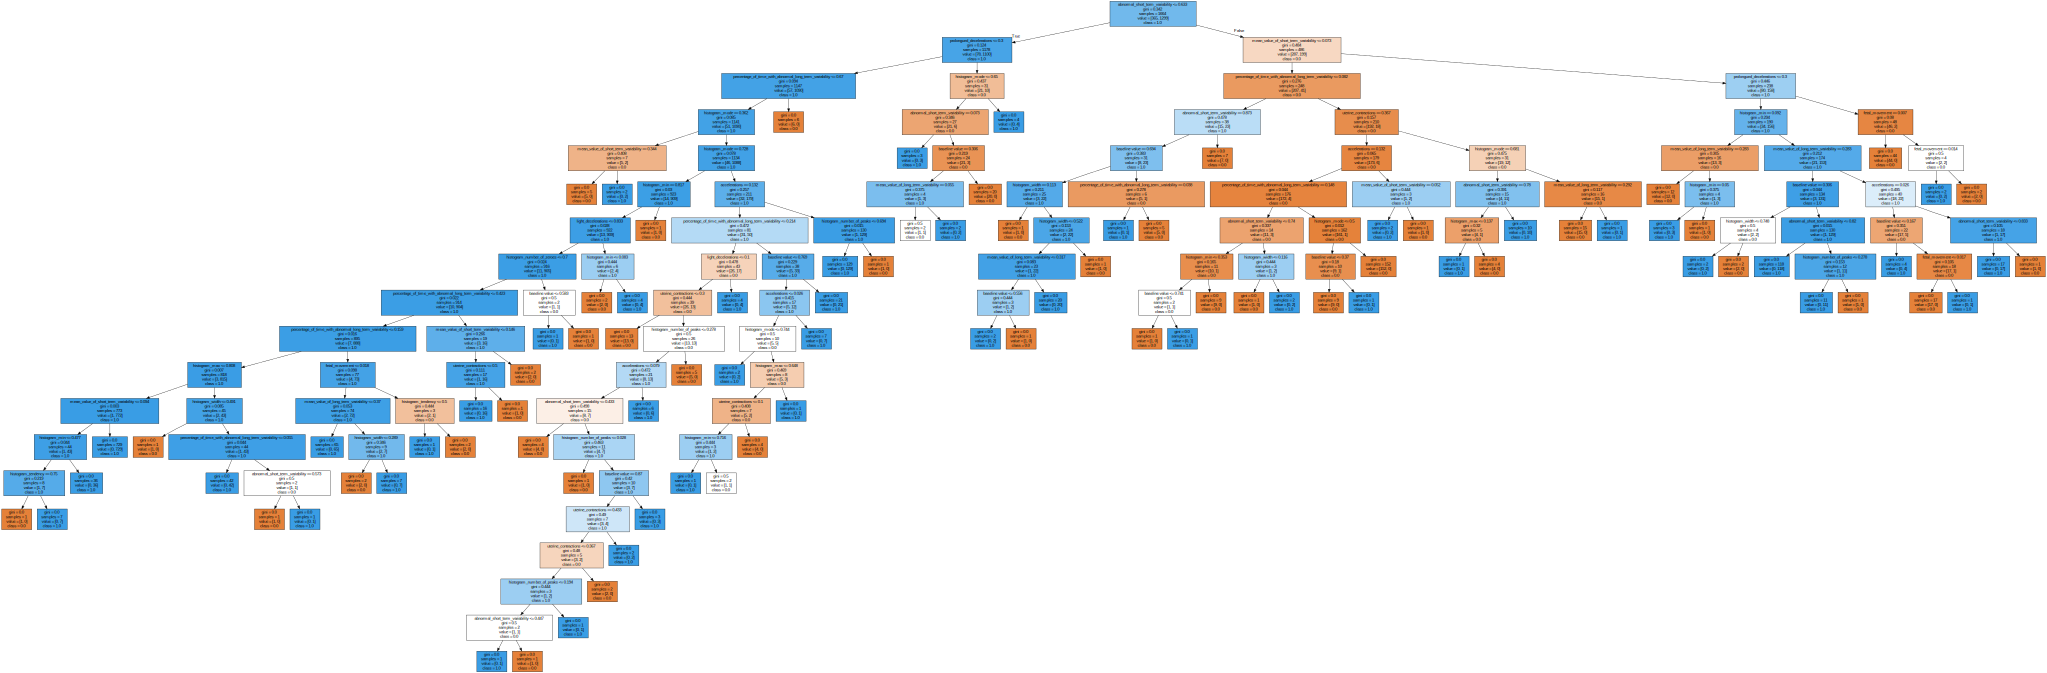

In [ ]:
clf1 = tree.export_graphviz(model1, feature_names=list(train1x.columns),class_names=['0.0','1.0'],filled=True)  
visualization1 = graphviz.Source(clf1)  
visualization1

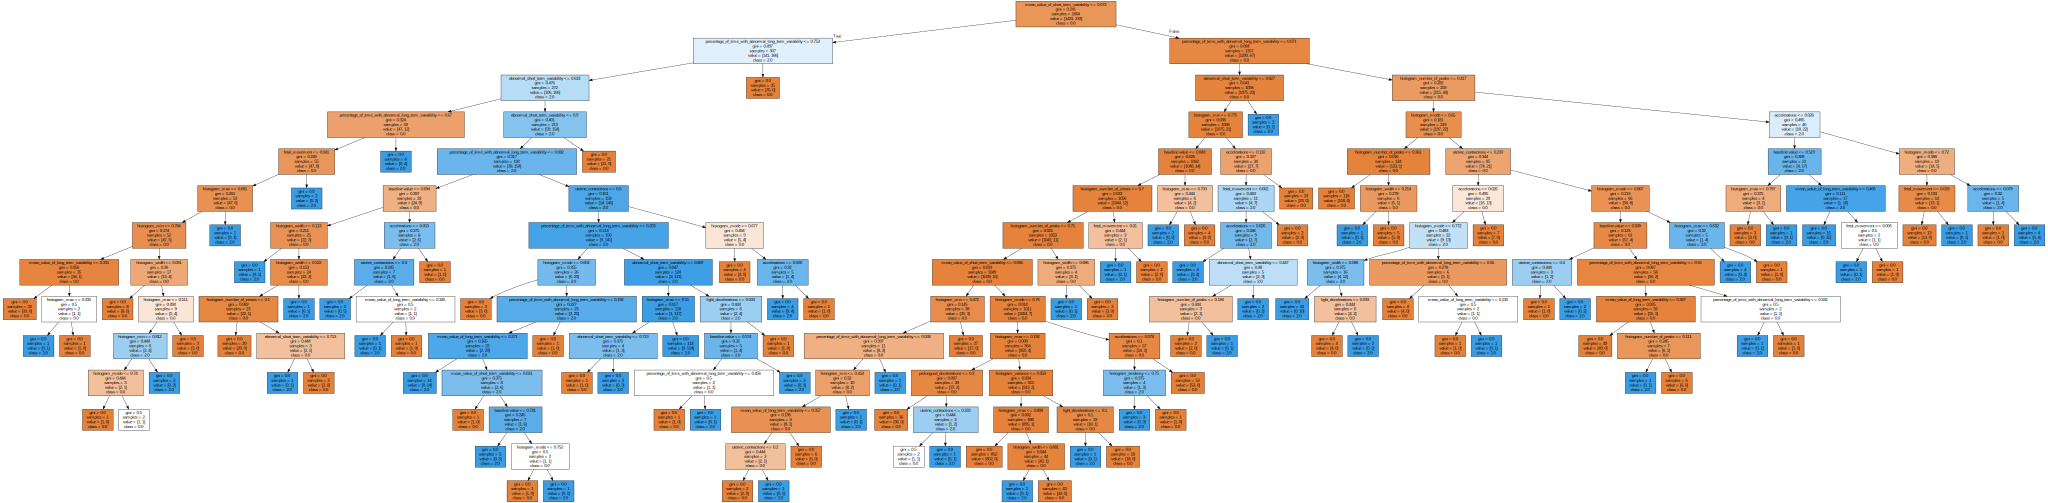

In [ ]:
clf2 = tree.export_graphviz(model2, feature_names=list(train2x.columns),class_names=['0.0','2.0'],filled=True)  
visualization2 = graphviz.Source(clf2)  
visualization2

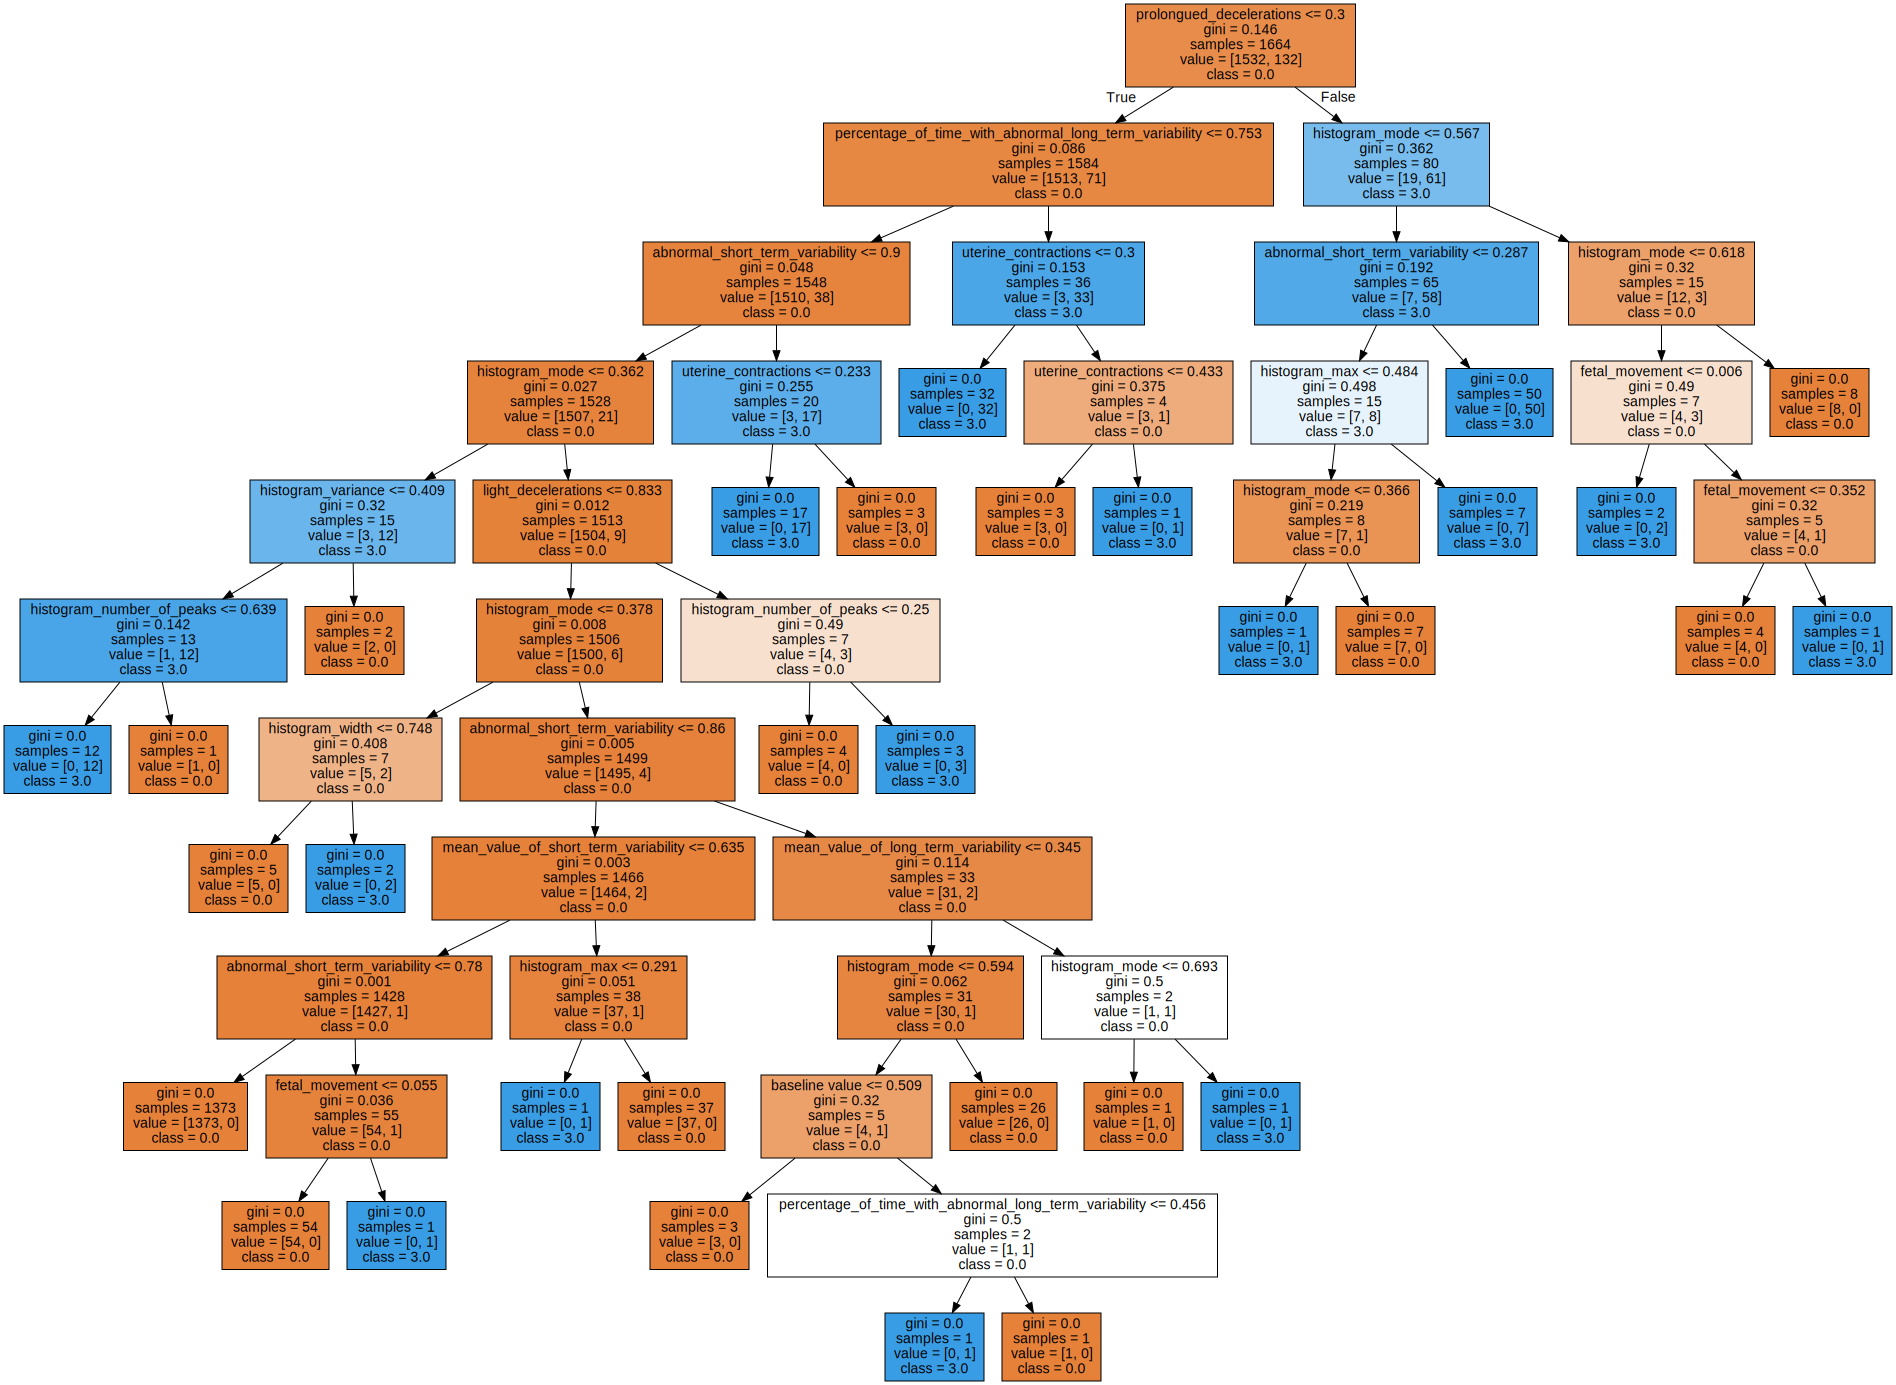

In [ ]:
clf3 = tree.export_graphviz(model3, feature_names=list(train3x.columns),class_names=['0.0','3.0'],filled=True)  
visualization3 = graphviz.Source(clf3)  
visualization3

In [ ]:
visualization1.render('Q2One')
visualization2.render('Q2Two')
visualization3.render('Q2Three')

'Q2Three.pdf'

In [ ]:
files.download('Q2One.pdf') 
files.download('Q2Two.pdf') 
files.download('Q2Three.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
dump(model1, 'q2One.joblib')
dump(model2, 'q2Two.joblib')
dump(model3, 'q2Three.joblib')

['q2Three.joblib']

In [ ]:
files.download('q2One.joblib') 
files.download('q2Two.joblib') 
files.download('q2Three.joblib') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>